# Viral analysis on MS 3' data

In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

input_dir = "/usersdata/yuanhua/archiveEBI/msclerosis/analysis/annoV33/"
dat_dir = "/usersdata/yuanhua/msNewData/"

os.chdir(dat_dir)

## Load data

In [2]:
# adata = sc.read(input_dir + "expr_csf.raw_counts.annoV33.h5ad")
# adata_rc3 = sc.read(dat_dir + "data_release/expr_csf_annot_clean_rc3.h5ad")

# adata = adata[adata_rc3.obs.index, :]
# adata.obsm['X_umap'] = adata_rc3.obsm['X_umap']

In [3]:
# adata = sc.read(input_dir + "expr_csf.raw_counts.annoV33.h5ad")
dfV33 = pd.read_csv(input_dir + "csf_v33_obs_with_celltyps.csv", index_col=0)

adata = sc.read(dat_dir + "data_release/expr_csf_annot_clean_rc5.h5ad")
adata.obs['donor_id'] = dfV33['donor_id'][adata.obs.index]

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (28,29,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
adata.obs.affection

cell_id
S14618-G1-AAAGTAGCACGTTGGC    1
S14618-G1-AAGGAGCCATACGCCG    1
S14618-G1-AATCGGTTCCGAATGT    1
S14618-G1-ACACCAAAGTGCGTGA    1
S14618-G1-ACACCGGGTTCCACAA    1
                             ..
S14619-H3-TTTGGTTCAAAGGAAG    2
S14619-H3-TTTGGTTGTTTGTTTC    2
S14619-H3-TTTGTCAAGTTGAGTA    2
S14619-H3-TTTGTCACAGCTCGCA    2
S14619-H3-TTTGTCATCAGTCAGT    2
Name: affection, Length: 96732, dtype: int64

In [5]:
adata.obs.groupby('donor_id').count().index

Index(['TU0517', 'TU0522', 'TU0523', 'TU0527', 'TU0529', 'TU0531', 'TU0532',
       'TU0533', 'TU0534', 'TU0535', 'TU0538', 'TU0539', 'TU0540', 'TU0541',
       'TU0543', 'TU0547', 'TU0548', 'TU0549', 'TU0550', 'TU0551', 'TU0552',
       'TU0553', 'TU0555', 'TU0556', 'TU0557', 'TU0558', 'TU0559', 'TU0563',
       'TU0564', 'TU0566', 'TU0567', 'TU0569', 'TU0570', 'TU0572', 'TU0573',
       'TU0574', 'TU0575', 'TU0577', 'TU0578', 'TU0582', 'TU0584', 'TU0586',
       'TU0588', 'TU0589', 'TU0591', 'TU0592', 'TU0593', 'TU0594', 'TU0595',
       'TU0596', 'TU0597', 'TU0598', 'TU0599', 'TU0600', 'TU0602', 'TU0604',
       'TU0605', 'TU0606', 'TU0607', 'TU0609', 'TU0611', 'TU0613', 'TU0615',
       'TU0616', 'TU0617', 'TU0619', 'TU0620', 'TU0622', 'TU0623', 'TU0624',
       'TU0626', 'TU0627', 'TU0628', 'TU0629', 'TU0638', 'TU0640', 'TU0645',
       'TU0646', 'TU0647', 'TU0649', 'TU0650'],
      dtype='object', name='donor_id')

In [6]:
adata.obs['total_log10_counts'] = np.log10(adata.X.sum(axis=1).A.reshape(-1))

In [7]:
adata

AnnData object with n_obs × n_vars = 96732 × 25003
    obs: 'cell', 'batch', 'donorseq', 'patient_id', 'gender', 'tissue', 'affection', 'disease', 'active', 'treated', 'oligoclonal', 'celltype', 'celltype_finer', 'donor_id', 'total_log10_counts'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells_by_counts'
    uns: 'affection_colors', 'celltype_colors', 'disease_colors', 'leiden', 'neighbors'
    obsm: 'X_mofa', 'X_umap', 'counts', 'counts_soups'
    varm: 'LFs'
    layers: 'counts', 'counts_soupx'
    obsp: 'connectivities', 'distances'

In [8]:
# np.unique(adata.obs['CellTypes_postsoupX_cleaner'], return_counts=True)
np.unique(adata.obs['celltype'], return_counts=True)

(array(['B cell', 'CD4+ T cell', 'CD4+ Treg cell', 'CD8+ T cell',
        'CD8+ gd T cell', 'MALAT1low myeloid cell', 'Macrophage',
        'NK cell', 'cDC1', 'cDC2', 'monocyte', 'pDC', 'plasma cell'],
       dtype=object),
 array([ 1046, 54524,  4064, 18502,   989,  4595,  2134,  4682,   299,
         3119,  1073,   663,  1042]))

Yuanhua to keep 'celltype' for fig 1d
add HAVCR2 from 'CellTypes_postsoupX_cleaner' for fig 1d-extra


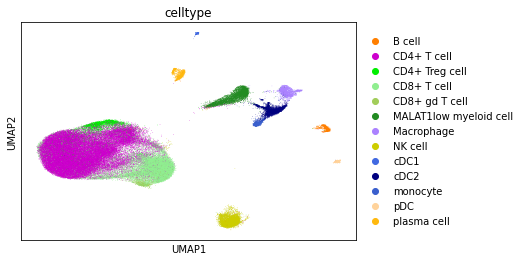

In [9]:
# sc.pl.umap(adata, color="CellTypes_postsoupX_master")
sc.pl.umap(adata, color="celltype")

In [10]:
adata.obs.index

Index(['S14618-G1-AAAGTAGCACGTTGGC', 'S14618-G1-AAGGAGCCATACGCCG',
       'S14618-G1-AATCGGTTCCGAATGT', 'S14618-G1-ACACCAAAGTGCGTGA',
       'S14618-G1-ACACCGGGTTCCACAA', 'S14618-G1-ACACTGATCTCTAGGA',
       'S14618-G1-ACAGCTATCTACCAGA', 'S14618-G1-ACCGTAACAAAGGAAG',
       'S14618-G1-ACCGTAATCTACCAGA', 'S14618-G1-ACCGTAATCTCGAGTA',
       ...
       'S14619-H3-TTTGCGCCACCAGCAC', 'S14619-H3-TTTGCGCCACCGAAAG',
       'S14619-H3-TTTGCGCCAGTCCTTC', 'S14619-H3-TTTGGTTAGACATAAC',
       'S14619-H3-TTTGGTTAGCGTAATA', 'S14619-H3-TTTGGTTCAAAGGAAG',
       'S14619-H3-TTTGGTTGTTTGTTTC', 'S14619-H3-TTTGTCAAGTTGAGTA',
       'S14619-H3-TTTGTCACAGCTCGCA', 'S14619-H3-TTTGTCATCAGTCAGT'],
      dtype='object', name='cell_id', length=96732)

## Load Viral data


In [11]:
import scqtlib
from scipy.sparse import hstack
from scqtlib.utils.io_utils import load_10X, save_10X

In [12]:
## unmapped reads
# viral_dir = dat_dir + '/virus833/'

## uncounted reads
viral_dir = dat_dir + '/virus833_xf25/'

In [13]:
samples = [ f.name for f in os.scandir(viral_dir) if f.is_dir() ]
samples[0], len(samples)

('S12765-B2', 84)

In [14]:
_mat, _genes, _cells = load_10X(
    viral_dir + '%s/Solo.out/Gene/raw/' %samples[0], source='STARsolo')

mat_full = _mat.copy()
gene_full = _genes.copy()
cell_full = [samples[0] + '-' + x.split('-')[0] for x in _cells]

In [15]:
for i in range(1, len(samples)):
    print(i, samples[i])
    _mat, _genes, _cells = load_10X(
        viral_dir + '%s/Solo.out/Gene/raw/' %samples[i], source='STARsolo')
    if np.mean(gene_full == _genes) < 1:
        print("Error: genes not matched in %s!" %samples[i])
        
    mat_full = hstack([mat_full, _mat])
    cell_full = cell_full + [samples[i] + '-' + x.split('-')[0] for x in _cells]

1 S14076-H7
2 S14077-H5
3 S14091-G2
4 S14092-H2
5 S14097-A9
6 S14100-C10
7 S14101-D10
8 S14102-E10
9 S14615-A1
10 S14616-E1
11 S14617-B3
12 S14618-B1
13 S14618-C1
14 S14618-D1
15 S14618-G1
16 S14618-H1
17 S14619-A3
18 S14619-F1
19 S14619-G3
20 S14619-H3
21 S14764-C3
22 S14962-A4
23 S14962-B4
24 S14962-E4
25 S14962-F4
26 S15203-E6
27 S15203-G6
28 S15203-H8
29 S15204-E11
30 S15204-E9
31 S15204-F11
32 S15204-H10
33 S15208-F9
34 S15291-E10
35 S15291-F7
36 S15291-G10
37 S15291-H9
38 S15297-F9
39 S15297-G9
40 S15299-D10
41 S15405-A3
42 S15406-A2
43 S15406-B3
44 S15406-C3
45 S15406-D3
46 S15409-B2
47 S15409-D2
48 S15425-A12
49 S15737-C9
50 S15737-E10
51 S15737-F4
52 S15844-F5
53 S15844-F8
54 S15844-G5
55 S15844-H5
56 S15850-B4
57 S15850-B6
58 S15924-A2
59 S15924-E1
60 S15924-F3
61 S15924-G12
62 S15924-H12
63 STU629-E3
64 S16802-B4
65 S16802-C5
66 S16802-F8
67 S16802-F9
68 S16803-E5
69 S16803-F12
70 S16803-G12
71 S16803-G9
72 S16803-H12
73 S16803-H9
74 S16857-E3
75 S16898-A12
76 S16898-A6
77 S

In [16]:
cell_full[:8]

['S12765-B2-AAAGATGGTGTTCTTT',
 'S12765-B2-AAAGCAAAGCAATCTC',
 'S12765-B2-AAAGCAAGTCTAAACC',
 'S12765-B2-AAATGCCCATGTCCTC',
 'S12765-B2-AACCATGGTCACTTCC',
 'S12765-B2-AACTTTCCAGCCTGTG',
 'S12765-B2-AACTTTCTCACAGTAC',
 'S12765-B2-AAGACCTAGCGTCAAG']

In [17]:
TT = mat_full.A.sum(axis=1)

In [18]:
mat_full

<833x182888 sparse matrix of type '<class 'numpy.int64'>'
	with 456758 stored elements in COOrdinate format>

In [19]:
sum(TT>=1)

78

In [20]:
idx = scqtlib.match(adata.obs.index, cell_full)
viral_mat = mat_full.tocsc()[:, idx]

In [21]:
mat_full.shape, viral_mat.shape

((833, 182888), (833, 96732))

In [22]:
np.mean(idx >= 0)

1.0

In [23]:
np.unique(-viral_mat.A.sum(axis=1), return_index=True)

(array([-78871, -74880, -35904, -21946, -13703, -13220, -10493, -10031,
         -9868,  -9757,  -7852,  -6803,  -6616,  -6201,  -5896,  -5259,
         -4919,  -4817,  -4731,  -4251,  -3707,  -3658,  -3362,  -3247,
         -3163,  -2942,  -2912,  -2493,  -2335,  -2182,  -1883,  -1676,
         -1619,  -1500,  -1496,  -1374,  -1147,  -1021,   -899,   -881,
          -780,   -706,   -633,   -601,   -595,   -574,   -568,   -428,
          -348,   -329,   -322,   -213,   -108,    -69,    -55,    -53,
           -38,    -28,    -26,    -23,    -20,    -19,    -15,    -11,
            -6,     -4,     -2,     -1,      0]),
 array([773, 782, 785, 804, 827, 817, 814, 779, 781, 818, 819, 764, 770,
        788, 772, 769, 784, 771, 815, 767, 826, 810, 647, 820, 193, 823,
        821, 797, 783, 801, 778, 800, 790, 822, 787, 816, 831, 806, 805,
        793, 807, 813, 825, 780, 775, 794, 828, 808, 811, 777, 774, 824,
        205, 206, 200,   0, 199, 786, 830, 789, 766, 809, 802, 768, 829,
        7

In [24]:
np.argmax(viral_mat.A.sum(axis=1))

773

In [25]:
viral_mat.A.sum(axis=1)[199]

38

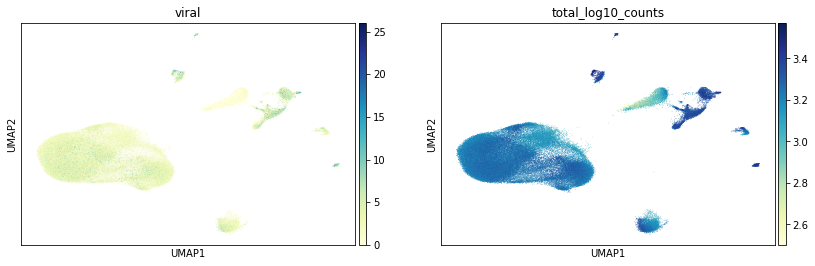

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 22, 26]),
 array([27596, 26924, 19013, 10937,  5813,  3023,  1589,   845,   429,
          226,   146,    71,    36,    45,    15,     6,     6,     3,
            2,     1,     2,     3,     1]))

In [26]:
# adata.obs['viral'] = viral_mat.A[199:207, :].sum(0) #viral_mat.A[205, :]
# adata.obs['viral'] = (viral_mat.A[193, :] > 0).astype(int)
# adata.obs['viral'] = viral_mat.A[785, :]

# adata.obs['viral'] = (viral_mat.A[785:, :].sum(axis=0) > 0).astype(int)
adata.obs['viral'] = viral_mat.A[785:, :].sum(axis=0)
sc.pl.umap(adata, color=["viral", 'total_log10_counts'], cmap='YlGnBu')

# adata.obs['viral'] = (viral_mat.A[785:, :].sum(axis=0) > 0).astype(str)
# sc.pl.umap(adata, color="viral", palette=['lightgrey', 'red'])

np.unique(adata.obs['viral'], return_counts=True)

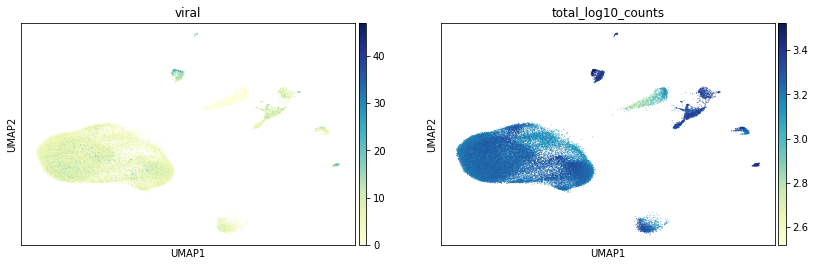

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 39, 41, 43, 47, 49, 51, 52]),
 array([11500, 12337, 13902, 13358, 11309,  9132,  6812,  5201,  3885,
         2739,  1994,  1356,   927,   685,   441,   325,   224,   156,
          117,    73,    55,    39,    31,    22,    25,    18,    13,
           13,     5,     5,     7,     4,     2,     3,     1,     4,
            2,     2,     1,     1,     2,     1,     1,     1,     1]))

In [27]:
# adata.obs['viral'] = viral_mat.A[199:207, :].sum(0) #viral_mat.A[205, :]
# adata.obs['viral'] = (viral_mat.A[193, :] > 0).astype(int)
# adata.obs['viral'] = viral_mat.A[785, :]

# adata.obs['viral'] = (viral_mat.A[785:, :].sum(axis=0) > 0).astype(int)
adata.obs['viral'] = viral_mat.A.sum(axis=0)
sc.pl.umap(adata[adata.obs['affection'] == 2, :], 
           color=["viral", 'total_log10_counts'], cmap='YlGnBu')

# adata.obs['viral'] = (viral_mat.A[785:, :].sum(axis=0) > 0).astype(str)
# sc.pl.umap(adata, color="viral", palette=['lightgrey', 'red'])

np.unique(adata.obs['viral'], return_counts=True)

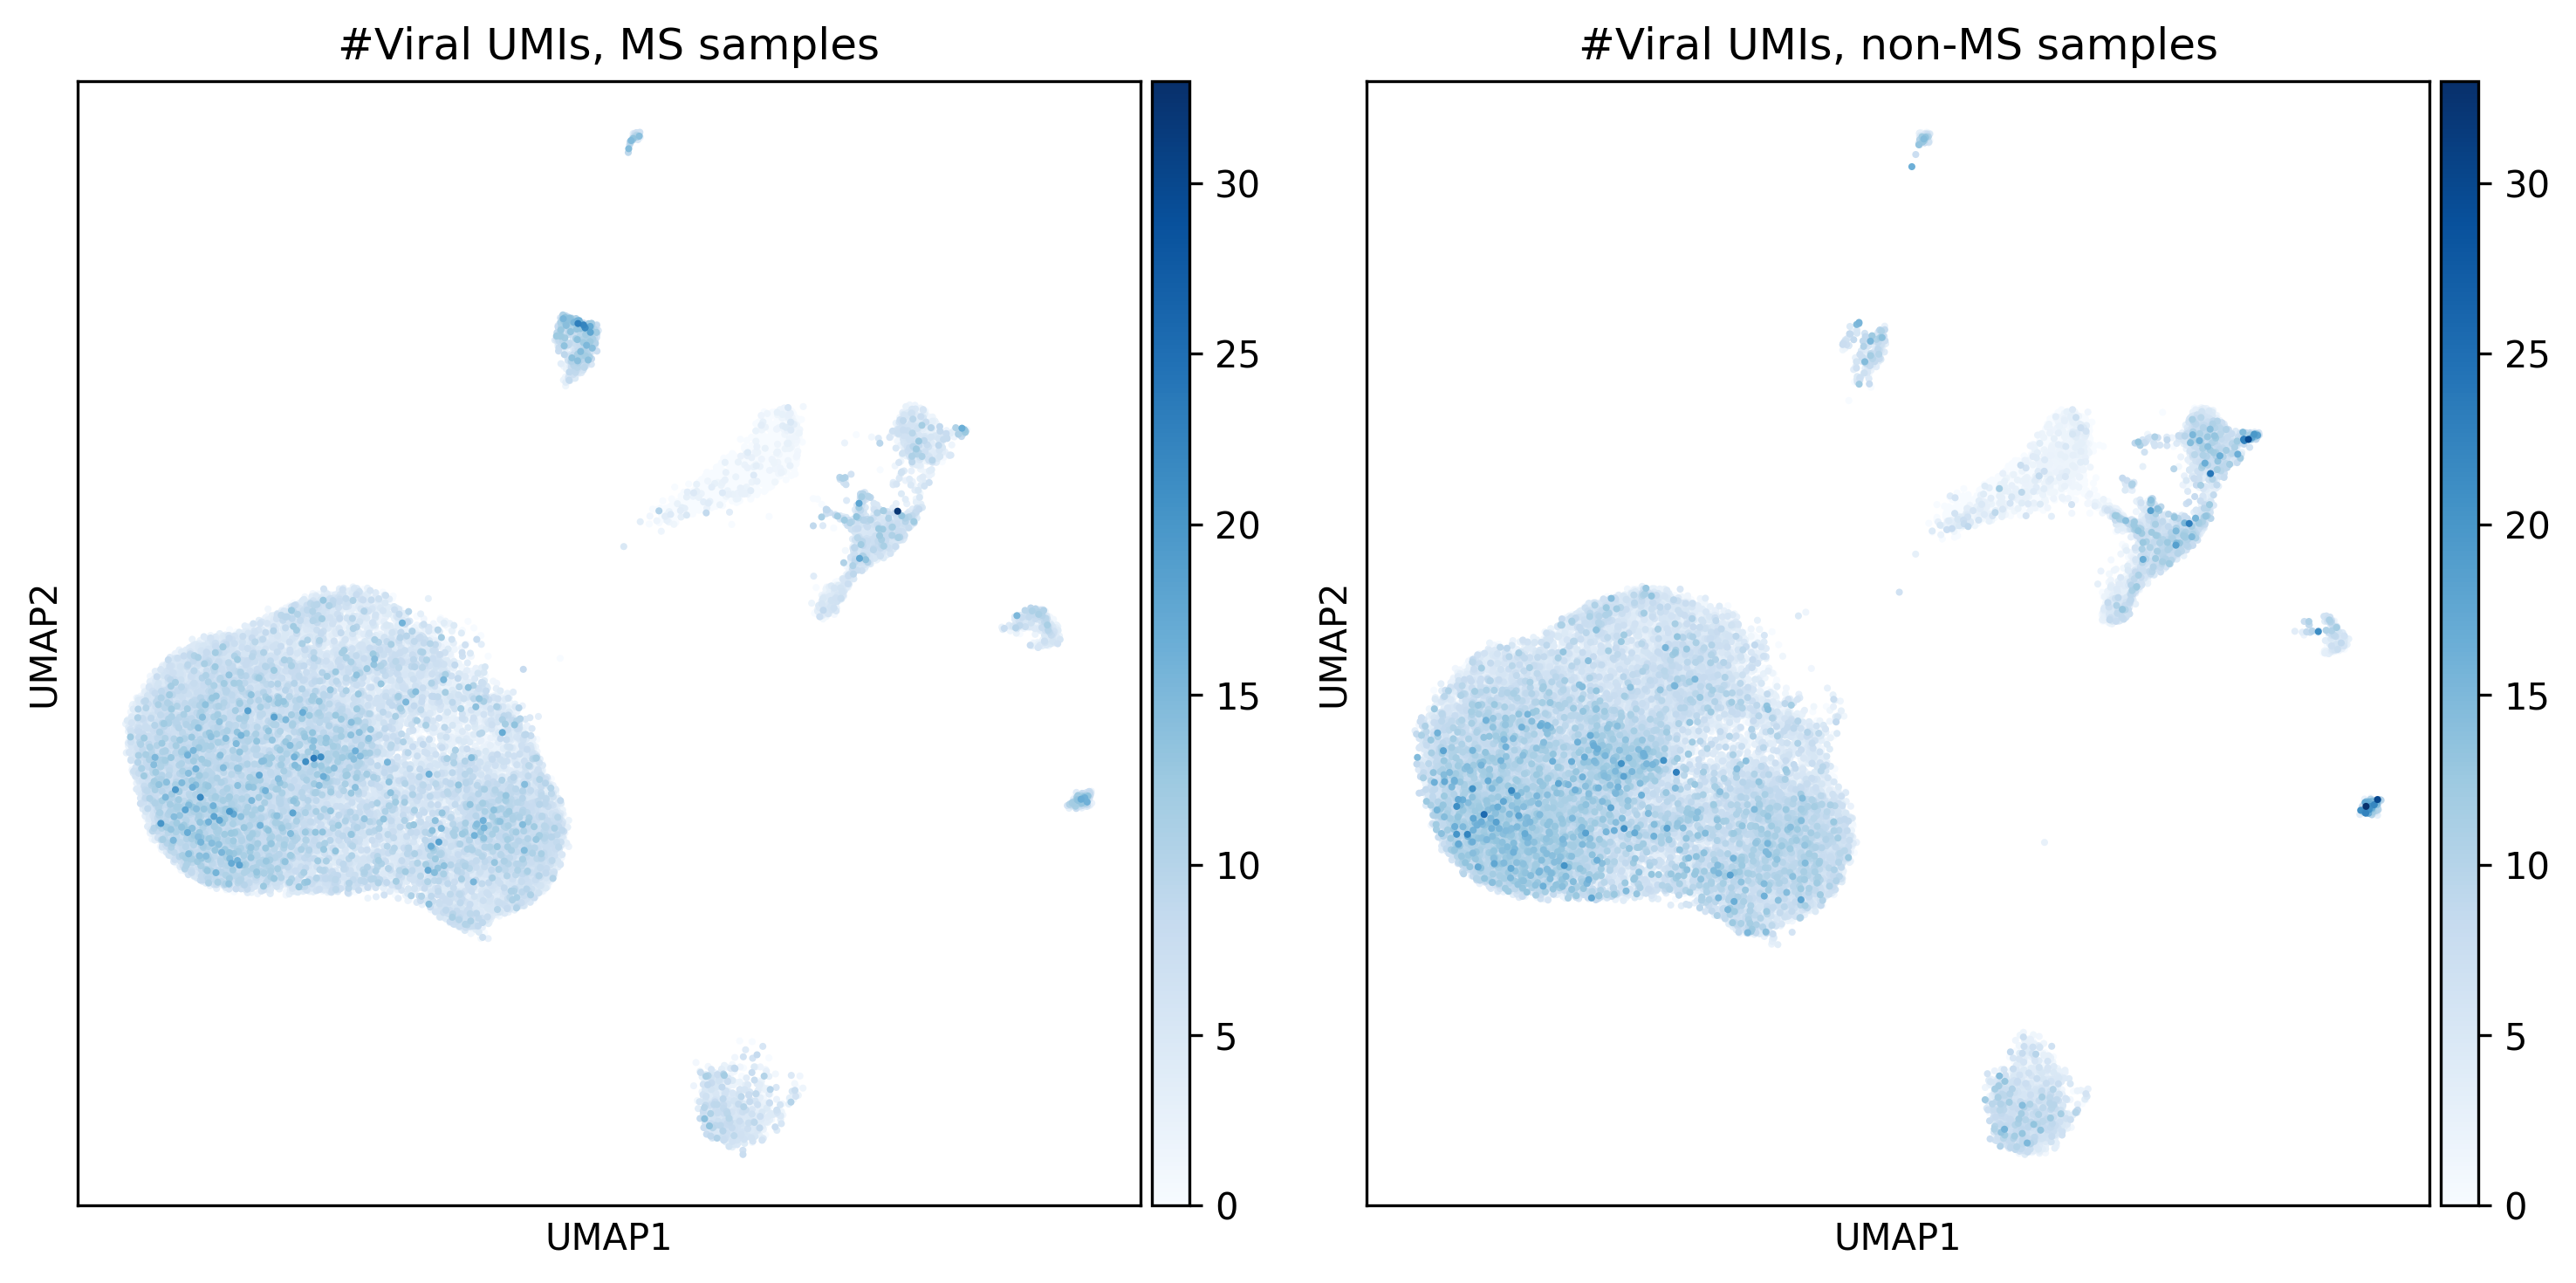

In [28]:
# adata.obs['viral'] = viral_mat.A[199:207, :].sum(0) #viral_mat.A[205, :]
# adata.obs['viral'] = (viral_mat.A[193, :] > 0).astype(int)
# adata.obs['viral'] = viral_mat.A[785, :]

# adata.obs['viral'] = (viral_mat.A[785:, :].sum(axis=0) > 0).astype(int)
adata.obs['viral'] = viral_mat.A.sum(axis=0)
adata.obs['viral_cpm'] = (adata.obs['viral'] / 10**(adata.obs['total_log10_counts']) *
                          10**(np.median(adata.obs['total_log10_counts'])))

fig = plt.figure(figsize=(10, 5), dpi=300)
ax1 = plt.subplot(1, 2, 1)
sc.pl.umap(adata[adata.obs['affection'] == 2, :], color=["viral_cpm"], 
           cmap='Blues', ax=ax1, show=False, vmax=33, size=15)
plt.title("#Viral UMIs, MS samples")

ax2 = plt.subplot(1, 2, 2)
sc.pl.umap(adata[adata.obs['affection'] == 1, :], color=["viral_cpm"], 
           cmap='Blues', ax=ax2, show=False, vmax=33, size=15)
plt.title("#Viral UMIs, non-MS samples")

plt.tight_layout()
fig_dir = '/usersdata/yuanhua/msNewData/figures/'

plt.savefig(fig_dir + '/viral_any_UMAP.pdf')
plt.show()

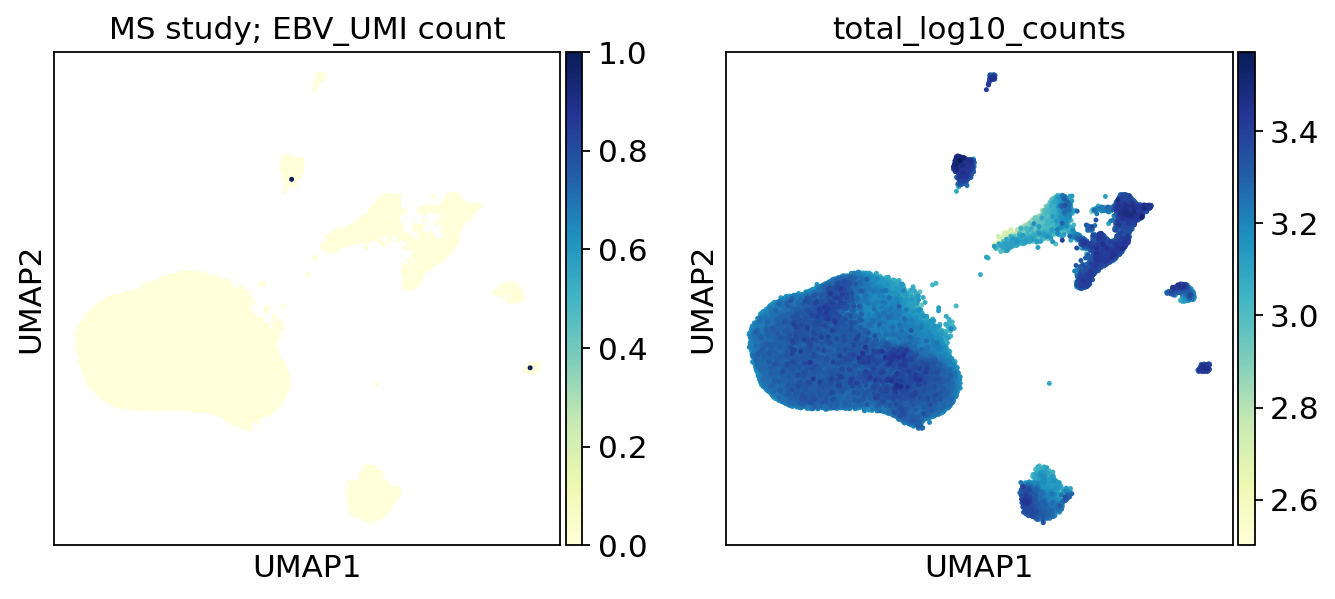

In [29]:
sc.set_figure_params(dpi=80)

adata.obs['MS study; EBV_UMI count'] = np.log2(viral_mat.A[202:204, :].sum(axis=0) + 1)
sc.pl.umap(adata, color=["MS study; EBV_UMI count", 'total_log10_counts'], 
           cmap='YlGnBu', size=20)

sc.set_figure_params(dpi=80)

In [30]:
np.unique(adata.obs['MS study; EBV_UMI count'], return_counts=True)

(array([0., 1.]), array([96730,     2]))

In [31]:
adata.obs[adata.obs['MS study; EBV_UMI count'] > 0]

,cell,batch,donorseq,patient_id,gender,tissue,affection,disease,active,treated,oligoclonal,celltype,celltype_finer,donor_id,total_log10_counts,viral,viral_cpm,MS study; EBV_UMI count
cell_id,,,,,,,,,,,,,,,,,,
S16898-A6-ATGCGATGTGGACGAT,ATGCGATGTGGACGAT-1-30,30,S16898-A6,Sample75,1,CSF,1,NIND,NaN,False,0.0,plasma cell,B plasma cell,TU0638,3.304101,9,7.025698,1.0
S14076-H7-TCTTTCCTCTACTTAC,TCTTTCCTCTACTTAC-1-77,77,S14076-H7,Sample3,2,CSF,1,NIND,NaN,False,0.0,pDC,pDC,TU0523,3.423606,27,16.006849,1.0


In [32]:
viral_mat

<833x96732 sparse matrix of type '<class 'numpy.int64'>'
	with 302865 stored elements in Compressed Sparse Column format>

In [33]:
adata.obsm['viral_mat'] = viral_mat.A.T

#### Save virus matrix

In [34]:
adata

AnnData object with n_obs × n_vars = 96732 × 25003
    obs: 'cell', 'batch', 'donorseq', 'patient_id', 'gender', 'tissue', 'affection', 'disease', 'active', 'treated', 'oligoclonal', 'celltype', 'celltype_finer', 'donor_id', 'total_log10_counts', 'viral', 'viral_cpm', 'MS study; EBV_UMI count'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells_by_counts'
    uns: 'affection_colors', 'celltype_colors', 'disease_colors', 'leiden', 'neighbors'
    obsm: 'X_mofa', 'X_umap', 'counts', 'counts_soups', 'viral_mat'
    varm: 'LFs'
    layers: 'counts', 'counts_soupx'
    obsp: 'connectivities', 'distances'

#### Donor level analysis

In [35]:
df_cell_info = pd.read_csv(viral_dir + 'cell_info.tsv', sep='\t', index_col=0)
df_cell_info

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (28,29,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cell,batch,donorseq,donor_id,tissue,doublet_score,doublet_label,assigned,affection,disease,...,Celltypes,Include,Celltypes_master,Celltypes_master_higher,celltype,celltype_group,use_cell,total_log10_counts,viral,MS study; log2(EBV_UMI+1)
cell_id,,,,,,,,,,,,,,,,,,,,,
S14618-G1-AAAGTAGCACGTTGGC,AAAGTAGCACGTTGGC-1-0,0,S14618-G1,TU0531,CSF,0.463,False,True,1.0,NIND,...,Macrophage_SPP1,True,Macrophage,Myeloid,macrophage,Myeloid,True,3.416474,3,0.0
S14618-G1-AAGGAGCCATACGCCG,AAGGAGCCATACGCCG-1-0,0,S14618-G1,TU0531,CSF,0.304,False,True,1.0,NIND,...,T_CD4_CTL,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.555095,3,0.0
S14618-G1-AATCGGTTCCGAATGT,AATCGGTTCCGAATGT-1-0,0,S14618-G1,TU0531,CSF,0.478,False,True,1.0,NIND,...,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.511883,4,0.0
S14618-G1-ACACCAAAGTGCGTGA,ACACCAAAGTGCGTGA-1-0,0,S14618-G1,TU0531,CSF,0.282,False,True,1.0,NIND,...,T_CD8,True,T_CD8,T_cell,CD8+ T cell,Lymphoid,True,3.434729,2,0.0
S14618-G1-ACACCGGGTTCCACAA,ACACCGGGTTCCACAA-1-0,0,S14618-G1,TU0531,CSF,0.338,False,True,1.0,NIND,...,T_CD8,True,T_CD8,T_cell,CD8+ T cell,Lymphoid,True,3.478999,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S14619-H3-TTTGGTTCAAAGGAAG,TTTGGTTCAAAGGAAG-1-83,83,S14619-H3,TU0548,CSF,0.054,False,True,2.0,MS,...,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.452553,2,0.0
S14619-H3-TTTGGTTGTTTGTTTC,TTTGGTTGTTTGTTTC-1-83,83,S14619-H3,TU0548,CSF,0.227,False,True,2.0,MS,...,cDC2,True,cDC2,Myeloid,cDC2,Myeloid,True,3.764027,3,0.0
S14619-H3-TTTGTCAAGTTGAGTA,TTTGTCAAGTTGAGTA-1-83,83,S14619-H3,TU0548,CSF,0.083,False,True,2.0,MS,...,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.531479,4,0.0
